# Проект: Исследование стартапов

- Автор: Нарыжный В.В.
- Дата: 22.04.2025

## Введение

**Описание проекта.** 
Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.Заказчик — столкнулся с проблемами неполных данных о компаниях, сделках и образовании. Критических пропусках в информации о раундах финансирования.
 
**Цель проекта :** 
Преобразовать данные для исследования. Проанализировать их и предоставить рекомендации заказчику
 
**Задачи:**
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Для анализа поступили данные о заведениях общественного питания. Данные состоят из двух датасетов:

- `acquisition.csv` — содержит информацию о покупках одними компаниями других компаний;
- `company_and_rounds.csv` —  содержит информацию о компаниях и раундах финансирования;
- `people.csv` - содержит информацию о сотрудниках
- `education.csv` - содержит информацию об образовании сотрудника
- `degrees.csv` - содержит информацию о типе образования сотрудника

Опциональные датасеты:
- `fund.csv` - содержит информацию о фондах
- `investment.csv` - содержит информацию о раундах инвестирования

### Описание датасета `acquisition.csv`

 - `id` — идентификатор покупки.
 - `acquiring_company_id` — идентификатор покупающей компании.
 - `acquired_company_id` — идентификатор покупаемой компании.
 - `term_code` — варианты расчёта.
 - `price_amount` — сумма сделки.
 - `acquired_at` — дата сделки.
 
 ### Описание датасета `company_and_rounds.csv`
 
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

### Описание датасета `people.csv`

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

### Описание датасета `education.csv`

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

### Описание датасета `degrees.csv`

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.



### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузим все данные по проекту.
- Проверим названия столбцов.
- Выведем информацию, которая необходима нам для принятия решений о предобработке, для каждого из датасетов.

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменных.

In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Загрузим все данные по проекту 
company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [4]:
# Проверим названия столбцов
def print_columns(df, name):
    print(f'\n Столбцы в таблице {name}')
    print(df.columns.tolist())

print_columns(acquisition_df, 'acquisition_df')
print_columns(company_df, 'company_df')
print_columns(education_df, 'education_df')
print_columns(people_df, 'people_df')
print_columns(degrees_df, 'degrees_df')


 Столбцы в таблице acquisition_df
['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']

 Столбцы в таблице company_df
['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round']

 Столбцы в таблице education_df
['id', 'person_id', 'instituition', 'graduated_at']

 Столбцы в таблице people_df
['id', 'first_name', 'last_name', 'company_id', 'network_username']

 Столбцы в таблице degrees_df
['id', 'object_id', 'degree_type', 'subject']


 - Видим проблемы в назвниях столбцов в таблице `company_df` : `company  ID` и `company  id` а также  столбцы не приведены к формату `snake_case`. 

In [5]:
# Приведем к общему формату
company_df.columns = [
    'company_id', 'name', 'category_code', 'status', 'founded_at', 
    'closed_at', 'domain', 'network_username', 'country_code', 
    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 
    'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type', 
    'raised_amount', 'pre_money_valuation', 'participants', 
    'is_first_round', 'is_last_round'
]
print(company_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


In [6]:
# Выведем информацию, которая необходима нам для принятия решений о предобработке, для каждого из датасетов.
def print_dataset(df, name):
    print(f'\n Информация о таблице {name}')
    print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
    print('\n Типы данных в датасете:')
    print(df.dtypes)
    print('\n Пропуски в датасете:')
    print(df.isnull().sum())
    print('\n Пример данных датасета:')
    print(df.head(2))

print_dataset(acquisition_df, 'acquisition_df')
print_dataset(company_df, 'company_df')
print_dataset(education_df, 'education_df')
print_dataset(people_df, 'people_df')
print_dataset(degrees_df, 'degrees_df')


 Информация о таблице acquisition_df
Размер датасета: 9407 строк, 6 столбцов

 Типы данных в датасете:
id                       int64
acquiring_company_id     int64
acquired_company_id      int64
term_code               object
price_amount             int64
acquired_at             object
dtype: object

 Пропуски в датасете:
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

 Пример данных датасета:
   id  acquiring_company_id  acquired_company_id term_code  price_amount  \
0   1                    11                   10       NaN      20000000   
1   7                    59                   72      cash      60000000   

  acquired_at  
0  2007-05-30  
1  2007-07-01  

 Информация о таблице company_df
Размер датасета: 217774 строк, 22 столбцов

 Типы данных в датасете:
company_id             float64
name                    object
category_code     

**Сделаем предварительные выводы:**

Таблица `acquisition_df`
 - Пропуски: 7576 в `term_code`, 29 в `acquired_at`.
 - Типы данных: `acquired_at`сохранен как `object`.
 
Таблица `company_df`
 - Пропуски: 214325 в `closed_at` (не все компании закрылись).164846 в столбцах `raised_amount`, `participants` и др.73888 в `category_code`.`
 - Дубликаты: `company_id` и `company_id_2`.
 - Типы данных: Все числовые поля как `float64`
 
Таблица `education_df`
 - Пропуски: 51556 в `graduated_at`. 55 в `instituition`.

Таблица `people_df`
 - Пропуски:192094 в `company_id`.187842 в `network_username`.
 - Типы данных: `company_id` как `float64` (нужно `int`).
 
Таблица `degrees_df`
 - Пропуски: 11218 в `degree_type`.28312 в `subject`.
 - Типы данных: `object_id` как `object` и содержит `р:`


### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [7]:
# Приведем столбцы с датами к типу datetime в таблице acquisition_df
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

In [8]:
# Приведем столбцы с датами к типу datetime в таблице company_df
date_columns = ['founded_at', 'closed_at', 'funded_at']
for col in date_columns:
    company_df[col] = pd.to_datetime(company_df[col], errors='coerce')

In [9]:
# Приведем столбцы с датами к типу datetime в таблице education_df
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

**Предварительный вывод по полноте данных:**
Таблица company_df:
 - `category_code`  73888 пропусков. Без категорий сложно проанализировать цену в зависимости от категории стартапов.
 - `founded_at` 107818 пропусков. Невозможно рассчитать возраст компании на момент сделки.
 - В данных о раундах большое количество пропусков в `raised_amount`, `participants` и др. Ставит под сомнение анализ цены в зависимости от количества раундов финансирования.

Таблица `people_df`:
 - `company_id` 192,094 пропусков. Невозможно связать многих сотрудников с компаниями.


Таблицы `education_df`:
 - `graduated_at`  51556 пропусков. Часть данных об образовании неполная.


Таблица `acquisition_df`:
 - `term_code` 7,576 пропусков. Непонятно как проводился расчет в сделакх.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание выполним без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года укажем:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [10]:
# Извлечем год из funded_at
company_df['year'] = company_df['funded_at'].dt.year
# Преобразуем в int
company_df['year'] = company_df['funded_at'].dt.year.astype('Int64') 

In [11]:
# Удаляим строки с пропусками в raised_amount и year
rounds_df = company_df.dropna(subset=['raised_amount', 'year'])
rounds_subset = rounds_df[['raised_amount', 'year']]
rounds_subset.head()

,raised_amount,year
0,5250000.0,2005
1,9500000.0,2007
2,25000000.0,2008
15,5000000.0,2008
20,0.0,2008


Сгруппируем по году и посчитаем типичный размер раунда и общее количество. Возьмем за типичный размер медиану чтобы избежать выбросов.

In [12]:
# Группируем по году
sum_rounds = rounds_df.groupby('year')['raised_amount'].agg(
    median_rounds = 'median',
    total_rounds = 'count'
).reset_index()

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [13]:
# Фильтруем годы с раундами более 50
sum_rounds = sum_rounds[sum_rounds['total_rounds'] > 50]
sum_rounds

,year,median_rounds,total_rounds
15,1999,2000000.0,76
16,2000,4200000.0,125
17,2001,3000000.0,96
18,2002,4200000.0,116
19,2003,3000000.0,159
20,2004,5000000.0,291
21,2005,5500000.0,1633
22,2006,5000000.0,2436
23,2007,3973320.0,3279
24,2008,3110000.0,3774


Построим линейный график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

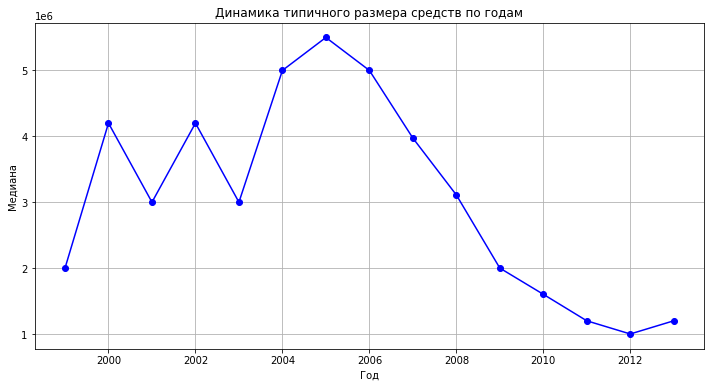

In [14]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим график
plt.plot(sum_rounds['year'], 
         sum_rounds['median_rounds'], 
         marker='o', 
         linestyle='-', 
         color='blue')

# Настраиваем оформление
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Медиана')
plt.grid(True)

plt.show()

**Ответим на вопросы:**
 - Год с максимальным типичным размером раунда это 2005 год — медиана составила 5,5 млн. После 2005 года медиана снижалась хотя количество сделок увеличивалось.
 - Тенденция в 2013 году : Количество раундов 11,072. Размер рунда (медиана 1,2 млн) в 2 раза меньше чем в 2005 году.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуем выбранные границы групп.
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Оценим, насколько информация об образовании сотрудников полна. Проверим пропуски в таблицах

In [15]:
# Пропуски в people_df
print("Пропуски в people_df:")
print(round((people_df.isna().sum() / len(people_df)) * 100,2))

# Пропуски в education_df
print("\nПропуски в education_df:")
print(round((education_df.isna().sum() / len(education_df)) * 100,2))

Пропуски в people_df:
id                   0.00
first_name           0.00
last_name            0.00
company_id          84.73
network_username    82.86
dtype: float64

Пропуски в education_df:
id               0.00
person_id        0.00
instituition     0.05
graduated_at    47.04
dtype: float64


 - В таблице `people_df`: 84.7% пропусков в стобце `company_id`. Это критично для связи с компаниями.В таблице `education_df`: 47% пропусков в стобце `graduated_at` но `person_id` заполнен.

Разделим компании на группы по размеру. Связжем сотрудников с их образованием

In [16]:
# Объединим people_df и education_df:
people_education = pd.merge(
    people_df.dropna(subset=['company_id']),
    education_df,
    left_on='id',
    right_on='person_id',
    how='left'
)

In [17]:
# Посчитаем количество сотрудников на компанию
company_size = people_education.groupby('company_id')['id_x'].count().reset_index(name='count')

In [18]:
# Проверим максимальное количество сотрудников
max_employees = company_size['count'].max()
print(f"Максимальное количество сотрудников в одной компании: {max_employees}")

Максимальное количество сотрудников в одной компании: 376


In [19]:
# Выберем границы групп
bins = [0, 10, 20, 377] 
labels = ['1-10', '11-20', '21+']
company_size['size_group'] = pd.cut(company_size['count'], bins=bins, labels=labels)

Обоснование границ: 

 - 1-10 это маленькие компании.

 - 11-20 это малый бизнес.

 - 21+ это средние и крупные компании. Объединили в одну группу потому что компаний >50 сотрудниками очень мало

In [20]:
# Добавим информацию о группе компании к данным о сотрудниках
people_education = pd.merge(
    people_education,
    company_size[['company_id', 'size_group']],
    on='company_id',
    how='left'
)

In [21]:
# Создадим столбец если "нет данных об образовании"
people_education['no_education'] = people_education['graduated_at'].isna()

In [22]:
# Почитаем среднюю долю сотрудников без образования по группам компаний
education_share = people_education.groupby('size_group')['no_education'].mean().reset_index()
education_share.columns = ['size_group', 'missing_education_rating']
education_share

,size_group,missing_education_rating
0,1-10,0.528573
1,11-20,0.561383
2,21+,0.558140


 - Можно сделать вывод о том что четкой зависимости между размером компаии и полнотой данных об образовании нет. Во всех группах пропуски более 50 процентов

Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Присоединение таблицы `degrees.csv` не решит проблему пропусков тем более в ней так же есть свои пропуски в `degree_type` и `subject`. Если в `graduated_at` отсутствует какая то запись то запись в `degrees.csv` всё равно не подтвердит факт образования а лишь укажет на специальность.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Для начала проверим наличие столбца network_username во всех таблицах

In [23]:
datasets = {
    'acquisition_df': acquisition_df,
    'company_df': company_df,
    'education_df': education_df,
    'people_df': people_df,
    'degrees_df': degrees_df
}

for name, df in datasets.items():
    if 'network_username' in df.columns:
        print(f"{name}: уникальных значений — {df['network_username'].nunique()}")
    else:
        print(f'{name}: нет')

acquisition_df: нет
company_df: уникальных значений — 79571
education_df: нет
people_df: уникальных значений — 38421
degrees_df: нет


Сравним значения в таблицах `company_df` и `people_df`

In [24]:
# Уникальные network_username в company_df
company_names = set(company_df['network_username'].dropna().unique())

In [25]:
# Уникальные network_username в people_df
people_names = set(people_df['network_username'].dropna().unique())

In [26]:
# Общие значения
total_names = company_names & people_names
print(f'Пересекающиеся network_username: {len(total_names)} из {len(company_names)} (company_df) и {len(people_names)} (people_df)')

Пересекающиеся network_username: 2199 из 79571 (company_df) и 38421 (people_df)


Как видим столбец network_username не подходит для объединения по причине слишкол малой доли общих значений между таблицами, а так же наличия пропусков в `people_df` - 83% в `company_df` - 56%


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратим внимание на структуру датасета, порядок и названия столбцов, проанализируем значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [27]:
# Выводим первые строки датафрейма на экран
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [28]:
# Удалим дубликаты в company_id и funding_round_id если они есть
company_df = company_df.drop_duplicates(
    subset=['company_id', 'funding_round_id'], 
    keep='first'
)

Разделим на 2 связанные таблица `companies` и `rounds`

In [29]:
#Таблица компаний
companies = company_df[
    ['company_id', 'name', 'category_code', 'status', 
     'founded_at', 'closed_at', 'domain', 'country_code']
].drop_duplicates('company_id')
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,country_code
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,USA
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,USA
4,100.0,There,games_video,acquired,NaT,NaT,there.com,USA
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN


In [30]:
# Таблица раундов
rounds = company_df[
    ['funding_round_id', 'company_id', 'funded_at', 
     'funding_round_type', 'raised_amount', 'participants']
]
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,participants
0,888.0,1.0,2005-10-01,series-a,5250000.0,2.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,3.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,4.0
3,NaN,10.0,NaT,NaN,NaN,NaN
4,NaN,100.0,NaT,NaN,NaN,NaN


Заполним пропуски для `category_code`(категория компании) значением `unknown` в таблице `companies` что позволит нам группировать по категориям

In [31]:
companies['category_code'] = companies['category_code'].fillna('unknown')
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,country_code
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,USA
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,USA
4,100.0,There,games_video,acquired,NaT,NaT,there.com,USA
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN


Удалим пропуски в столбцах `funded_at`(дата раунда) и `raised_amount`(сумма) в таблице `rounds`

In [32]:
rounds = rounds.dropna(subset=['funded_at', 'raised_amount'])
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,participants
0,888.0,1.0,2005-10-01,series-a,5250000.0,2.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,3.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,4.0
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,3.0
20,6682.0,10014.0,2008-09-01,angel,0.0,1.0


Подготовили таблицы сохранив их связность и исключили возможные возникающие при этом ошибки разделив на две таблицы(компании и раунды).Подготовили данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.Теперь можно отбирать компании по категориям и считать показатели в разрезе компании.


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверим полноту и корректность получившейся таблицы. Далее будем работать только с этими данными.

Используем подготовленные таблицы `companies` и `rounds`

In [33]:
# Отбираем компании по критериям
target_companies = companies[
    (companies['company_id'].isin(rounds['company_id'])) |
    (companies['status'] == 'acquired')                    
]

In [34]:
# Проверяем количество
print(f'Отобрано компаний: {len(target_companies)}')

Отобрано компаний: 38319


Добавляем информацию о раундах


In [35]:
# Посчитаем количество раундов и сумму привлеченных средств
company_stats = rounds.groupby('company_id').agg(
    total_rounds = ('funding_round_id', 'count'),
    funding_total = ('raised_amount', 'sum')
).reset_index()

In [36]:
# Объединим с основными данными
merged_df = pd.merge(
    target_companies,
    company_stats,
    on ='company_id',
    how ='left'
)

In [37]:
# Заполняем пропуски для acquired
merged_df['total_rounds'] = merged_df['total_rounds'].fillna(0)
merged_df['total_raised'] = merged_df['funding_total'].fillna(0)

Проверим полноту и корректность получившейся таблицы.

In [38]:
# Проверим распределение по статусам
statuses = merged_df['status'].value_counts(normalize=True)
print(round(statuses * 100,1))

operating    68.9
acquired     24.5
closed        5.3
ipo           1.3
Name: status, dtype: float64


**Данные содержат:**

 - 68.9% operating (действующие компании)

 - 24.5% acquired (приобретенные компании)

 - 5.3% closed (закрытые компании)

 - 1.3% ipo (публичные компании)

In [39]:
# Проверим пропуски
missing = merged_df[['founded_at', 'country_code', 'total_raised']].isna().sum()
print(missing)

founded_at      11282
country_code     4680
total_raised        0
dtype: int64


**Пропуски:**
 - `founded_at` - 11282 пропуска.
 - `country_code` - 4680 пропусков
 - `total_raised` - без пропусков      

Таблица готова к анализу.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [40]:
# Показатели describe()
merged_df['funding_total'].describe()

count    3.150700e+04
mean     1.308173e+07
std      6.389273e+07
min      0.000000e+00
25%      2.000000e+05
50%      1.747668e+06
75%      9.300000e+06
max      5.700000e+09
Name: funding_total, dtype: float64

**Данные несимметричны.**
 - Средний показатель (13 млн) завышен из-за выбросов
 - Медиана (1,75 млн) типичный размер финансирования
 - Максимум (5,7 млрд) явный выброс
 - Стандартное отклонение (63 млн) огромный разброс
 
Для построения графика найдем ключевые показатели - медиану, границу выбросов, отфильтруем данные

In [41]:
# Найдем границу выбросов с помощью IQR
q3 = merged_df['funding_total'].quantile(0.75)  
iqr = q3 - merged_df['funding_total'].quantile(0.25) 
upper_bound = q3 + 1.5 * iqr 
upper_bound

22950000.0

In [42]:
# Найдем медиану
median_data = merged_df['funding_total'].median() 
median_data

1747668.0

Построим графики распределения финансирования и для наглядности отфильтруем данные <= 30 млн

In [43]:
# Фильтруем данные 
filtered_data = merged_df[merged_df['funding_total'] <= 30_000_000]

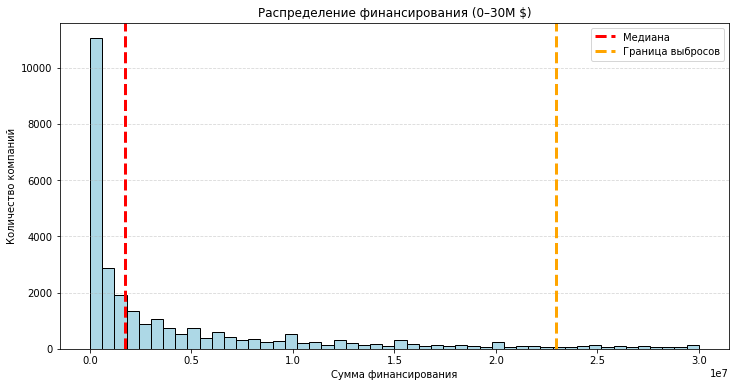

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12, 6))

# # Строим диаграмму с помощью pandas 
plt.hist(
    filtered_data['funding_total'], 
    bins = 50, 
    color ='lightblue', 
    edgecolor ='black'
)

# Разметка медианы и верней границы
plt.axvline(median_data, color ='red', linestyle = '--', linewidth = 3, 
            label = f'Медиана')
plt.axvline(upper_bound, color = 'orange', linestyle = '--', linewidth = 3, 
            label = f'Граница выбросов')

# Настраиваем оформление графика
plt.title('Распределение финансирования (0–30M $)')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.show()

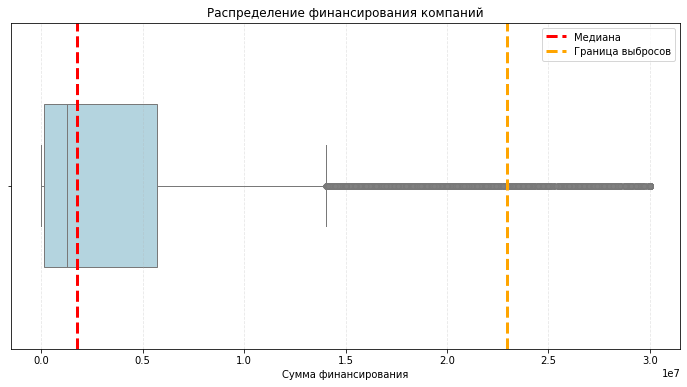

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='funding_total',
    data=filtered_data,
    color='lightblue',
    width=0.5,
    linewidth=1,
    flierprops={'marker': 'o','markerfacecolor': 'gray'}
)

# Разметка медианы и верней границы
plt.axvline(median_data, color ='red', linestyle = '--', linewidth = 3, 
            label = f'Медиана')
plt.axvline(upper_bound, color = 'orange', linestyle = '--', linewidth = 3, 
            label = f'Граница выбросов')


# Настраиваем оформление графика
plt.title('Распределение финансирования компаний')
plt.xlabel('Сумма финансирования')
plt.legend()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

plt.show()

Оценим размер общего финансирования. 

**Типичный размер финансирования**
 - Медиана: 1.75M
 - IQR-диапазон: 0,2 млн - 9,3 млн типичный разброс для 50%  компаний
 
**Выбивающийся размер финансирования**
 - Выбросы более 22 млн.Все что больше это исключительные случаи
 
**Гистограмма:**
- Пик в районе 0–2 млн.
- Резкий спад после 10 млн.

**Boxplot:**
 - Ящик компактный но усы тянутся далеко.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

Найдем компании, которые были проданы за ноль или за один доллар. Для этого нам потребуется столбец `price_amount` из таблицы `acquisition.csv`

In [46]:
# Нахйдем сделки за 0 или 1 доллар
filtered_deals = acquisition_df[acquisition_df['price_amount'].isin([0, 1])]

In [47]:
# Соединим с merged_df 
result_df = pd.merge(
    filtered_deals,
    merged_df,
    left_on = 'acquired_company_id',
    right_on = 'company_id',
    how = 'inner'
)

In [48]:
# Фильтруем funding_total > 0
filtered_companies = result_df[result_df['funding_total'] > 0]

In [49]:
# Выводим результат
print(f'Найдено компаний: {len(filtered_companies)}')
print(filtered_companies[['name', 'price_amount', 'funding_total']].head())

Найдено компаний: 1615
          name  price_amount  funding_total
1       Reddit             0       100000.0
12  Maya's Mom             0      1000000.0
14     Glimpse             0      4000000.0
16    Newsvine             0      1250000.0
20   BeliefNet             0      7000000.0


Теперь рассчитаем верхнюю и нижнюю границу выбросов с помощью IQR для столбца `funding_total` и укажем каким процентилям границы соответствуют.

In [50]:
# Рассчитываем квартили и IQR
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Считаем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound

-18250000.0

In [51]:
# Посчитаем процентили
lower_percentile = (filtered_companies['funding_total'] <= lower_bound).mean() * 100
upper_percentile = (filtered_companies['funding_total'] <= upper_bound).mean() * 100

print(f'Нижняя граница: {lower_bound} (процентиль: {lower_percentile}%)')
print(f'Верхняя граница: {upper_bound} (процентиль: {upper_percentile}%)')

Нижняя граница: -18250000.0 (процентиль: 0.0%)
Верхняя граница: 35750000.0 (процентиль: 90.95975232198143%)


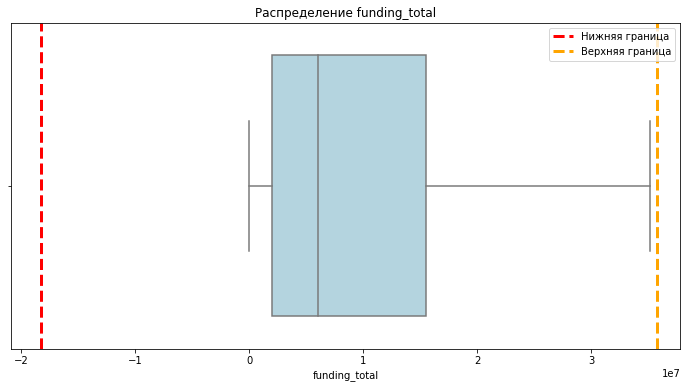

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12, 6))

# Строим график без выбросов для информативности
sns.boxplot(x = filtered_companies['funding_total'], 
            showfliers = False,
            color = 'lightblue')

# Настраиваем оформление графика
plt.title('Распределение funding_total')
plt.axvline(lower_bound, color = 'red', linestyle = '--', linewidth = 3, label = f'Нижняя граница')
plt.axvline(upper_bound, color = 'orange', linestyle = '--', linewidth = 3, label = f'Верхняя граница')
plt.legend()


plt.show()

**Основное распределение:**

 - Медианное значение финансирования 6 млн (центральная линия ящика)

 - 50% компаний получили между Q1 и Q3 (границы ящика)

 - "Усы" показывают типичный диапазон значений без выбросов

**Границы выбросов:**

 - Нижняя граница -18.25 млн. 

 - Верхняя граница 35.75 млн

Почему то компании с объемом финансирования более 35.75 млн проданы за 0 или 1 доллар. Возможно компании - банкроты либо поглощение дочерних компаний.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [53]:
# Объединим датасеты acquisition_df и merged_df
full_df = pd.merge(
    acquisition_df,
    merged_df,
    left_on='acquired_company_id',
    right_on='company_id',
    how='inner'
)

# Проверим распределение цен
full_df['price_amount'].describe()

count    9.390000e+03
mean     3.939881e+08
std      2.684624e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.362550e+04
max      2.600000e+12
Name: price_amount, dtype: float64

Данные о ценах в столбце `price_amount` содержат аномальные значения - от 0 до 2.6 трлн. Прежде чем ответим на вопросы, очистим данные.

In [54]:
# Фильтруем диапазон цен
filtered_df = full_df[
    (full_df['price_amount'] > 1) & 
    (full_df['price_amount'] <= 1_000_000_000)
]

# Проверяем результат
print(f'Осталось сделок: {len(filtered_df)} из {len(full_df)}')

Осталось сделок: 2263 из 9390


In [55]:
# Создаем пустую таблицу
category_stats = pd.DataFrame()

# Количество сделок по категориям
category_stats['count'] = filtered_df.groupby('category_code').size()

# Медианная цена
category_stats['median_price'] = filtered_df.groupby('category_code')['price_amount'].median()

# Разброс цен 
q75 = filtered_df.groupby('category_code')['price_amount'].quantile(0.75)
q25 = filtered_df.groupby('category_code')['price_amount'].quantile(0.25)
category_stats['iqr'] = q75 - q25

# Сортируем по медиане
category_stats = category_stats.sort_values('median_price', ascending=False)
category_stats.head(10)

,count,median_price,iqr
category_code,,,
sports,2,622500000,362500000.0
nanotech,1,584000000,0.0
analytics,3,200000000,91500000.0
fashion,3,195000000,86250000.0
cleantech,35,167000000,275750000.0
medical,4,165000000,278375000.0
security,32,149250000,275625000.0
ecommerce,49,135000000,336700000.0
biotech,235,135000000,370000000.0


In [56]:
# Создаем отдельную таблицу для медианных цен
median_top = category_stats[['count', 'median_price']].head(5)
median_top = median_top.rename(columns={'median_price': 'median_price'})
print('Топ-5 категорий по медианной цене:')
median_top

Топ-5 категорий по медианной цене:


,count,median_price
category_code,,
sports,2,622500000
nanotech,1,584000000
analytics,3,200000000
fashion,3,195000000
cleantech,35,167000000


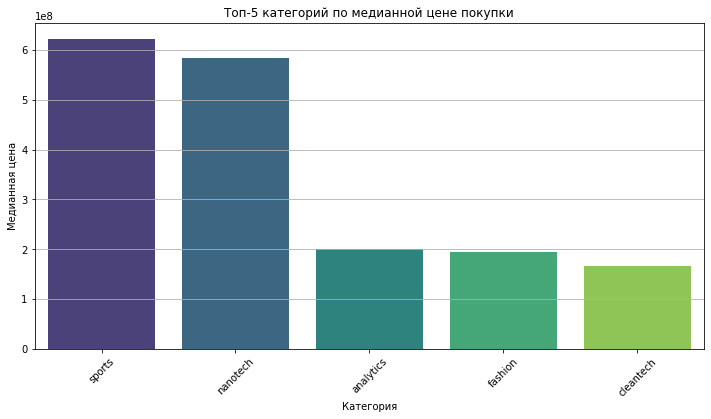

In [57]:
# Создаём контейнер графика  и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму 
ax1 = sns.barplot(
    x=median_top.index,
    y='median_price',
    data=median_top.reset_index(),
    palette='viridis'
)

# Настраиваем оформление графика
plt.title('Топ-5 категорий по медианной цене покупки')
plt.ylabel('Медианная цена')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [58]:
# Сортируем по IQR и берем первые 5 строк
iqr_sorted = category_stats.sort_values('iqr', ascending=False)
iqr_top = iqr_sorted[['count', 'iqr']].head(5)
iqr_top = iqr_top.rename(columns={'iqr': 'price_iqr'})
print('Топ-5 категорий по разбросу цен:')
iqr_top

Топ-5 категорий по разбросу цен:


,count,price_iqr
category_code,,
biotech,235,370000000.0
sports,2,362500000.0
ecommerce,49,336700000.0
manufacturing,14,328975000.0
medical,4,278375000.0


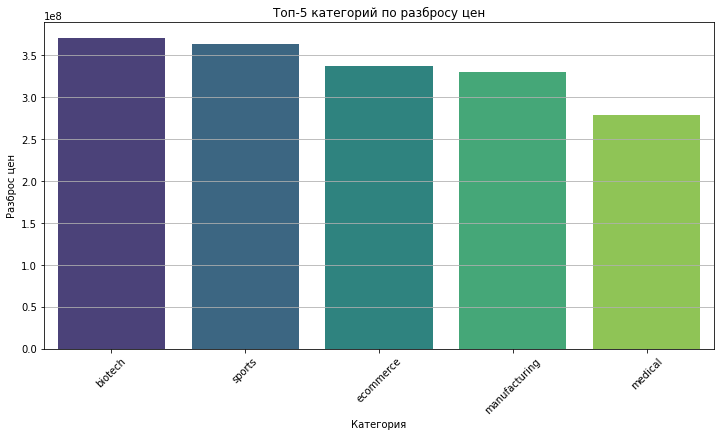

In [59]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму 
ax2 = sns.barplot(
    x=iqr_top.index,
    y='price_iqr',
    data=iqr_top.reset_index(),
    palette='viridis'
)

# Настраиваем оформление графика
plt.title('Топ-5 категорий по разбросу цен')
plt.ylabel('Разброс цен')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

 - Исключили нулевые цены и сделки более 1 млрд для устранения явных аномалий
 - Выбраны пять категорий для баланса между наглядностью и полнотой данных а также выбор позволяет выявить значимые тренды 
 - Выбрали медиану вместо среднего потому что она устойчива к выбросам(в данных есть выбросы).IQR вместо стандартного отклонения  показывает типичный разброс между 25% и 75% цен
 


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделаем выводы.

Для начала сгруппируем компании по статусам и выведем количество, медиану, среднее и межквартильный разброс.

In [60]:
# Отфильтруем компании с раундом более одного
full_df = merged_df[merged_df['total_rounds'] >= 1]

# Вычислим квантили
q25 = full_df.groupby('status')['total_rounds'].quantile(0.25)
q75 = full_df.groupby('status')['total_rounds'].quantile(0.75)

# Подсчитаем показатели
stats = pd.DataFrame({
    'Количество': full_df.groupby('status').size(),
    'Медиана': full_df.groupby('status')['total_rounds'].median(),
    'Среднее': full_df.groupby('status')['total_rounds'].mean(),
    'IQR': q75 - q25 
}).sort_values('Медиана', ascending=False)
stats

,Количество,Медиана,Среднее,IQR
status,,,,
ipo,489,2.0,2.529652,2.0
acquired,2583,1.0,1.896245,1.0
closed,2027,1.0,1.389245,1.0
operating,26408,1.0,1.644615,1.0


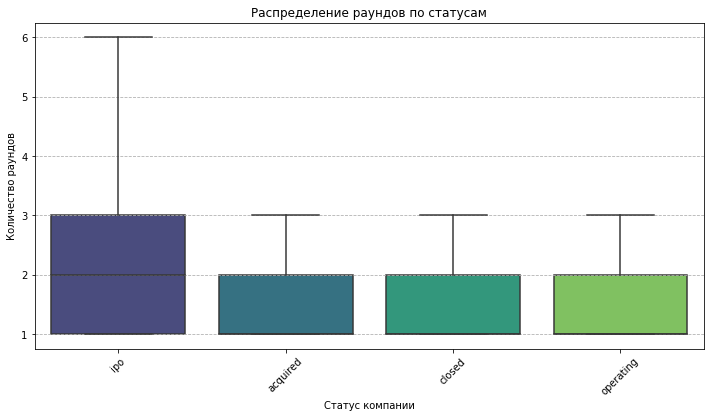

In [61]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12, 6))

# Строим график
sns.boxplot(
    x ='status',
    y ='total_rounds',
    data = full_df,
    order = stats.index,
    palette = "viridis",
    showfliers = False
)

# Настраиваем оформление графика
plt.title('Распределение раундов по статусам')
plt.xlabel('Статус компании')
plt.ylabel('Количество раундов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

**Типичное количество раундов:**

 - `ipo` 2 раунда

 - `acquired`  1 раунд

 - `operating`  1 раунд

 - `closed`  1 раунд

**Разброс:**

 - ipo 2 раунда (от 1 до 3)

 - Остальные  1 раунд (от 1 до 2)


## Шаг 4. Итоговый вывод и рекомендации

**Отбор и объединение данных:**

 - Выделены компании с ненулевым финансированием (`funding_rounds > 0`) или статусом `acquired` (38319 стартапов).

 - Проверена корректность данных (пропуски, дубликаты, аномалии).

**Анализ выбросов в финансировании:**

 - Определены типичные диапазоны `funding_total` (медиана, перцентили).

 - Выявлены аномалии: компании с высоким финансированием, но продажей за 0/1 (возможные ошибки или специфические сделки).

**Категории стартапов с высокой ценой и разбросом:**

 - Найдены отрасли с самыми высокими средними ценами покупки (например `sports, nanotech, analytics`).

 - Выделены категории с максимальным разбросом цен (например `biotech, sports, ecommerce`) что указывает на высокие риски/доходы.

**Анализ раундов финансирования:**

 - Компании с `ipo` (публичные) проходят достоверно больше раундов (медиана = 2.0).

 - `acquired` и `closed` почти идентичны по числу раундов.

 - Возможно, количество раундов не является ключевым фактором для продажи компании.
 
Компании с финансированием чаще меняют владельцев (`acquired`) но не все сделки логичны например  продажи за 1млн при миллионных инвестициях.

Связь между количеством раундов и статусом `acquired` есть, но требуется уточнение.Возможно раунды это не причина а следствие успешности.
 
**Рекомендации:**
 - Проверить аномальные сделки (продажи за 0/1) на корректность.

 - Инвестировать в стартапы из топовых категорий (например `sports`).

 - Изучить причины разброса цен в отраслях.